# Project 2 - Ames Housing Data and Kaggle Challenge

Welcome to Project 2! It's time to start modeling.

**Primary Learning Objectives:**
1. Creating and iteratively refining a regression model
2. Using [Kaggle](https://www.kaggle.com/) to practice the modeling process
3. Providing business insights through reporting and presentation.

You are tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

## The Modeling Process

1. The train dataset has all of the columns that you will need to generate and refine your models. The test dataset has all of those columns except for the target that you are trying to predict in your Regression model.
2. Generate your regression model using the training data. We expect that within this process, you'll be making use of:
    - train-test split
    - cross-validation / grid searching for hyperparameters
    - strong exploratory data analysis to question correlation and relationship across predictive variables
    - code that reproducibly and consistently applies feature transformation (such as the preprocessing library)
3. Predict the values for your target column in the test dataset and submit your predictions to Kaggle to see how your model does against unknown data.
    - **Note**: Kaggle expects to see your submissions in a specific format. Check the challenge's page to make sure you are formatting your CSVs correctly!
    - **You are limited to models you've learned in class**. In other words, you cannot use XGBoost, Neural Networks or any other advanced model for this project.
4. Evaluate your models!
    - consider your evaluation metrics
    - consider your baseline score
    - how can your model be used for inference?
    - why do you believe your model will generalize to new data?

## Business Statement

1. As a property agent/real estate agency, which houses should we focus our efforts on selling, to yield the best sales/commission? Which should we avoid?  

2. Can we build a model to accurately predict the saleprice of a house, to become The Authority in house saleprices which house buyers can turn to?

## Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

## Read in datasets

In [2]:
path = './datasets/'
df_train = pd.read_csv(path+'train.csv')    #train data
df_test = pd.read_csv(path+'test.csv')      #test data
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## EDA, data cleaning

In [4]:
df_train.describe()   ### Transposing here would make it a lot more readable. 

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


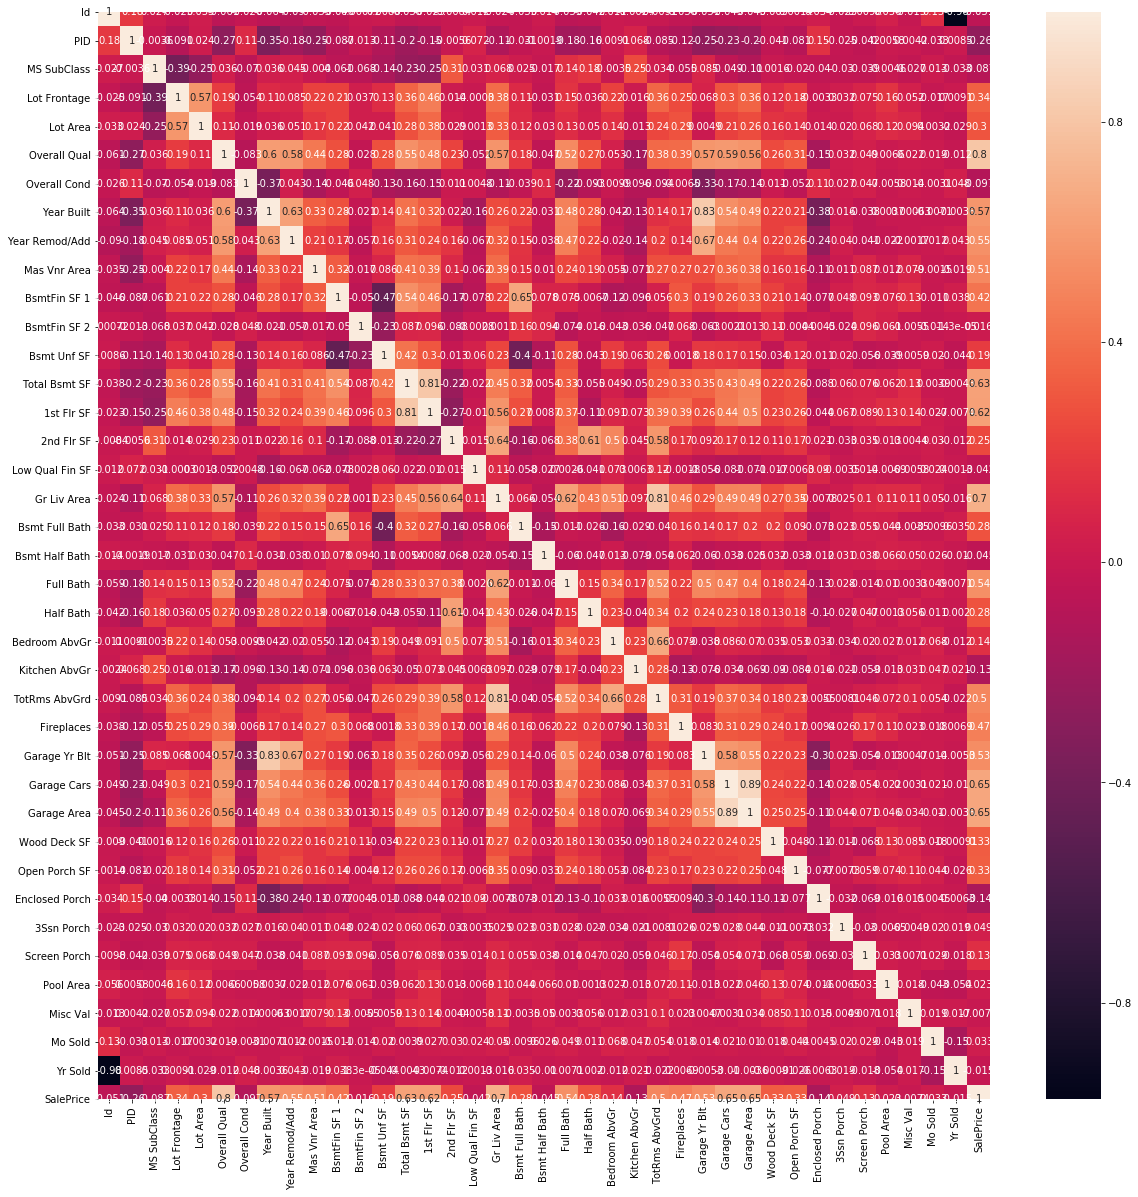

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True)

In [ ]:
### not a very pretty visualisation. Might want to leave out the numeric annotations or use fewer values. 
### Maybe increase the dpi so that the numbers are easier to read if you really want to leave them in. 

We can see that some features are highly collinear/correlated to each other, so 1 of the pair should probably be removed later during feature selection:

-1st Flr SF, Total Bsmt SF (0.81)

-Yr built, Garage Yr Built (0.83)

-Gr Liv Area, TotRooms AbvGrd (0.81)

-Garage Area, Garage Cars (0.89)

We also see that some features are highly correlated to the target SalePrice:

-Overall Qual (0.8)

-Gr Liv Area (0.7)

-Garage Cars (0.65), Garage Area (0.65), which as mentioned, are likely duplicates. Hence should just keep 1

In [6]:
# examine datatypes, nulls
df_train.info(), df_test.info()

# we notice many nulls for some features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

(None, None)

In [7]:
# MS SubClass being categorical should be changed to str
df_train['MS SubClass'] = df_train['MS SubClass'].astype('str')
df_test['MS SubClass'] = df_test['MS SubClass'].astype('str')

# Bsmt SF 1/2/unf are all different, hence should not be omitted just because there's a 'Total Bsmt SF'. 

In [8]:
# examine % of nulls
(df_train.isnull().sum()/len(df_train)*100).sort_values(ascending=False)

Pool QC            99.561190
Misc Feature       96.830814
Alley              93.174061
Fence              80.497318
Fireplace Qu       48.756704
Lot Frontage       16.089712
Garage Finish       5.558264
Garage Cond         5.558264
Garage Qual         5.558264
Garage Yr Blt       5.558264
Garage Type         5.509508
Bsmt Exposure       2.827889
BsmtFin Type 2      2.730375
BsmtFin Type 1      2.681619
Bsmt Cond           2.681619
Bsmt Qual           2.681619
Mas Vnr Type        1.072647
Mas Vnr Area        1.072647
Bsmt Half Bath      0.097513
Bsmt Full Bath      0.097513
Garage Cars         0.048757
Garage Area         0.048757
Bsmt Unf SF         0.048757
BsmtFin SF 2        0.048757
Total Bsmt SF       0.048757
BsmtFin SF 1        0.048757
Overall Cond        0.000000
Exterior 2nd        0.000000
Exterior 1st        0.000000
Roof Matl           0.000000
                     ...    
Heating             0.000000
Exter Cond          0.000000
TotRms AbvGrd       0.000000
Yr Sold       

df_train: 

-for the top 6 features (all dtype objects except Lot Frontage) which have MANY nulls, its cos they have no such feature (eg. no pool/misc feature).

-Likewise for the Garage (=no garage), Bsmt (=no basement), Vnr (=no vnr) features.

-Hence should replace all them nulls with 0.

In [9]:
# examine % of nulls
(df_test.isnull().sum()/len(df_test)*100).sort_values(ascending=False)  ### Just showing the first few here would be enough

Pool QC            99.544937
Misc Feature       95.335609
Alley              93.401593
Fence              80.432309
Fireplace Qu       48.009101
Lot Frontage       18.202503
Garage Cond         5.119454
Garage Qual         5.119454
Garage Yr Blt       5.119454
Garage Finish       5.119454
Garage Type         5.005688
Bsmt Exposure       2.844141
BsmtFin Type 1      2.844141
Bsmt Qual           2.844141
BsmtFin Type 2      2.844141
Bsmt Cond           2.844141
Mas Vnr Area        0.113766
Mas Vnr Type        0.113766
Electrical          0.113766
Overall Cond        0.000000
Exter Qual          0.000000
Exter Cond          0.000000
Foundation          0.000000
Exterior 2nd        0.000000
Exterior 1st        0.000000
Roof Matl           0.000000
Roof Style          0.000000
Year Remod/Add      0.000000
Year Built          0.000000
Sale Type           0.000000
                     ...    
Misc Val            0.000000
Pool Area           0.000000
Screen Porch        0.000000
3Ssn Porch    

df_test:

-similar observations as df_train. We should also replace the nulls, with 0. CANNOT delete rows cos kaggle requires no change to original 879 rows. 

In [10]:
df_train = df_train.fillna(0)    #fill those nulls with 0, because 'NaN' just means eg. there is no basement, no garage
df_test = df_test.fillna(0)

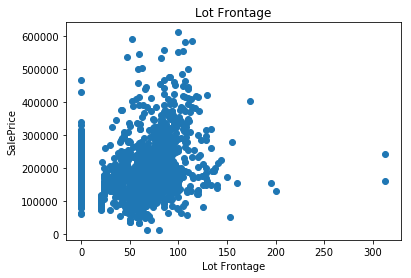

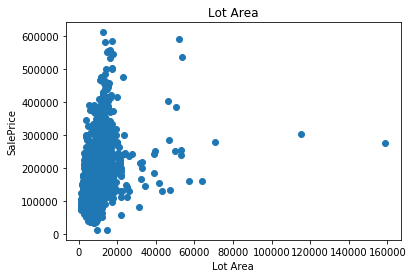

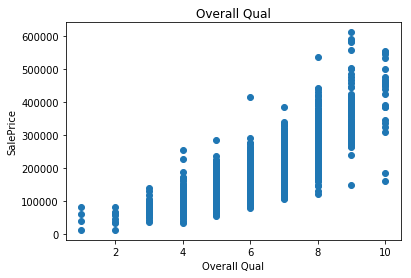

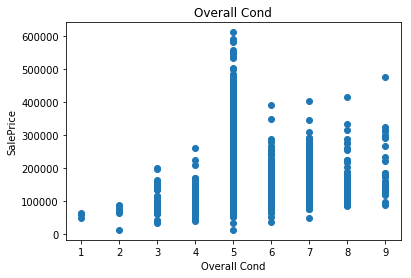

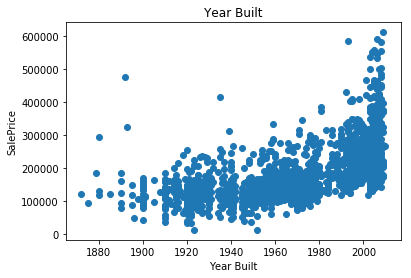

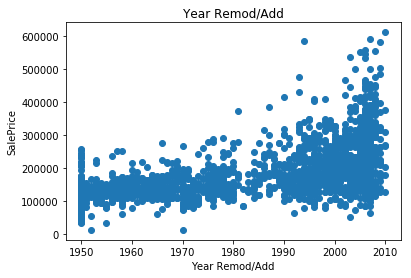

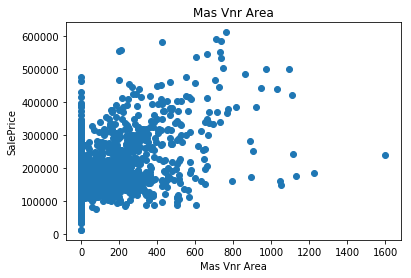

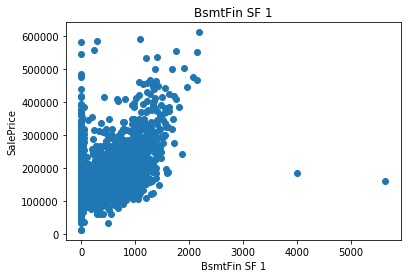

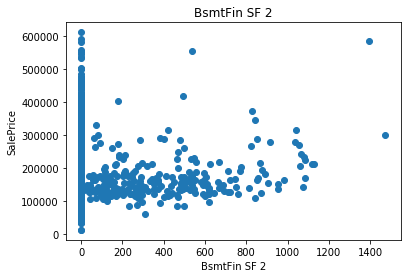

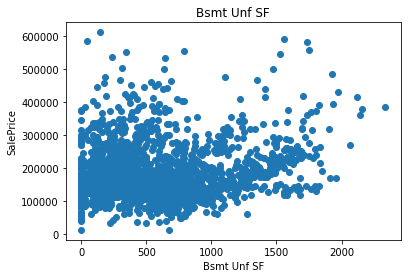

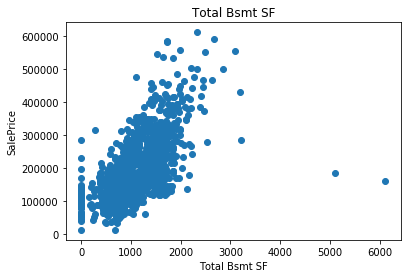

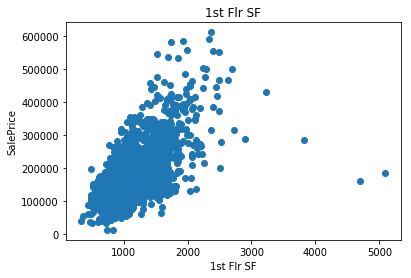

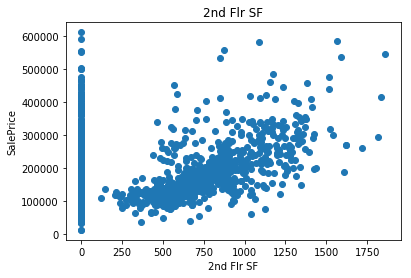

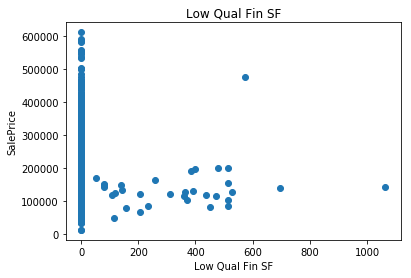

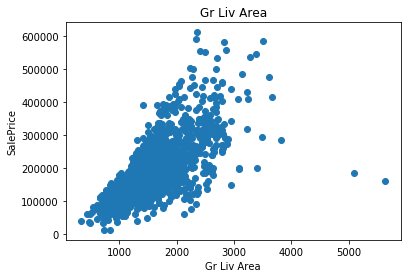

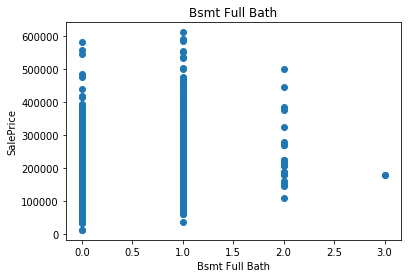

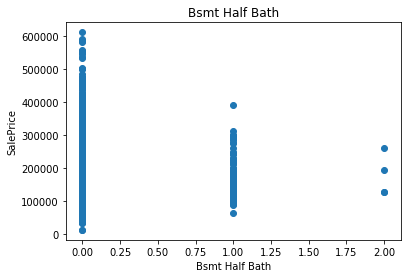

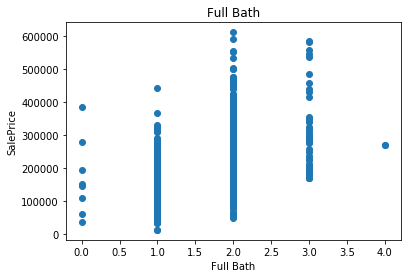

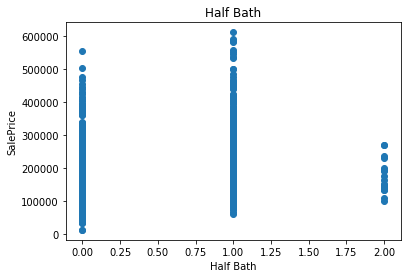

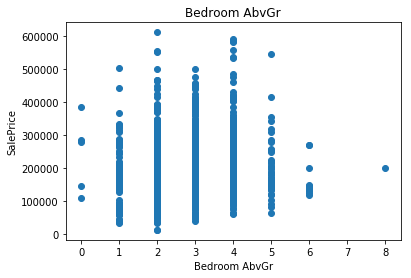

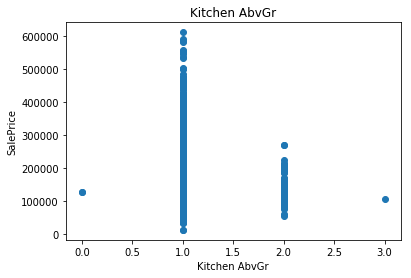

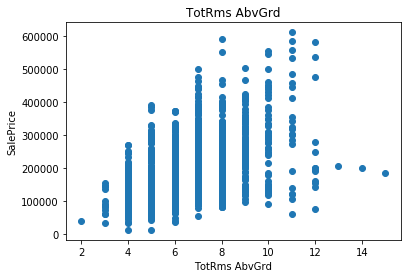

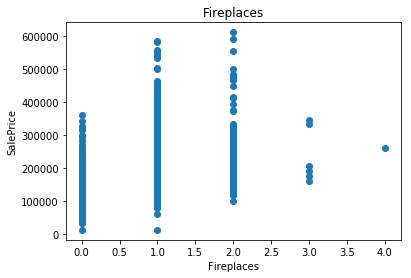

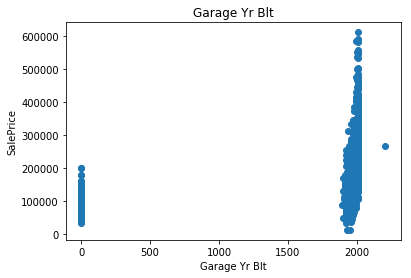

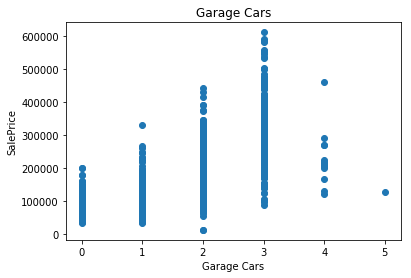

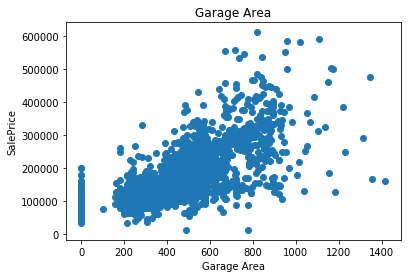

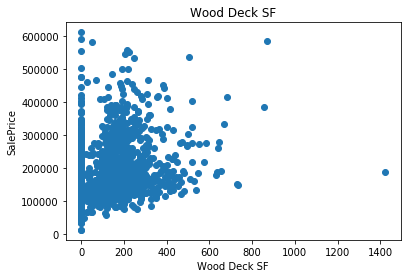

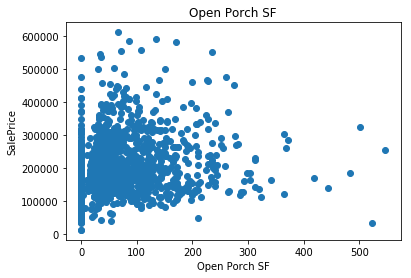

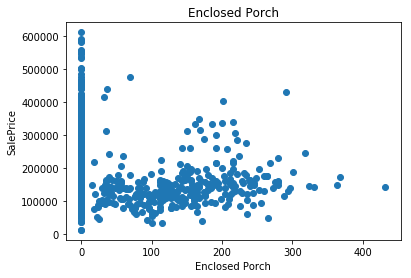

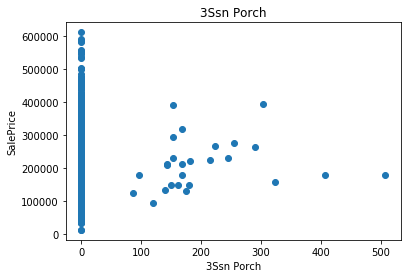

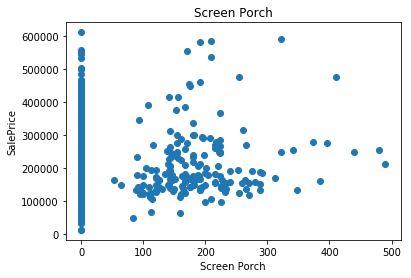

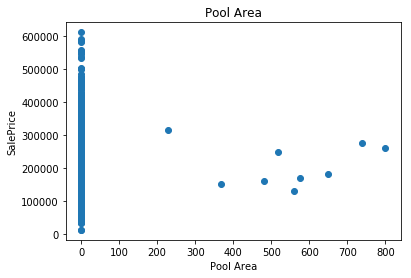

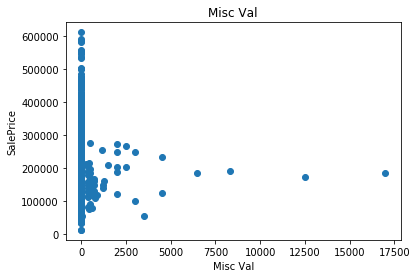

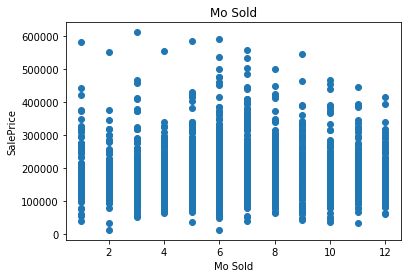

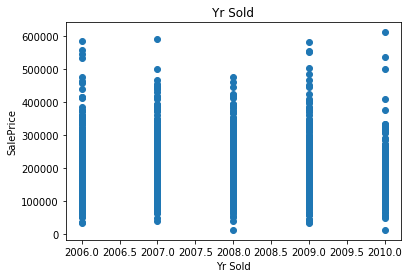

In [11]:
# visualise all numerical features, spot outliers

# identify numerical features
numerical_features = []
for i in df_train.columns[2:-1]:    #omit ID, PID, SalePrice
    if df_train[i].dtype != 'object':
        numerical_features.append(i)

# scatter plot only numerical features
for i in range(len(numerical_features)):
    plt.scatter(df_train[numerical_features[i]],df_train['SalePrice'])
    plt.title(numerical_features[i])
    plt.xlabel(numerical_features[i])
    plt.ylabel('SalePrice')
    plt.show()

Looks like some features have outliers:

1. Lot Frontage, Lot Area, BsmtFin SF1, Total Bsmt SF, 1st Flr SF, Gr Liv Area - 2 pts on extreme right, but without a high price that follows the trend. These may all be pointing to the same 2 houses

2. Garage Yr Blt - 1 pt built in 2200, clearly wrong. Many with yr built=0 due to earlier step, thats fine,

3. Mas Vnr Area - 1 pt on extreme right, but without a high price that follows the trend. But this might not be anomalous

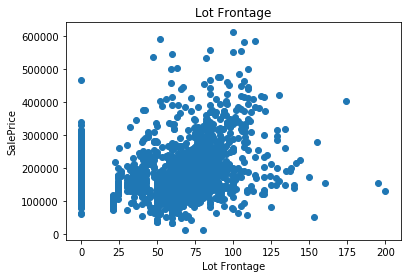

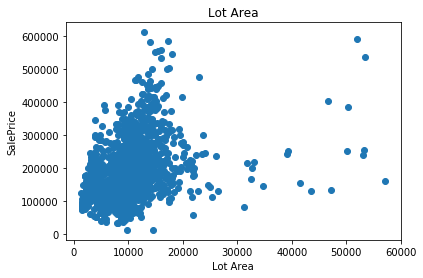

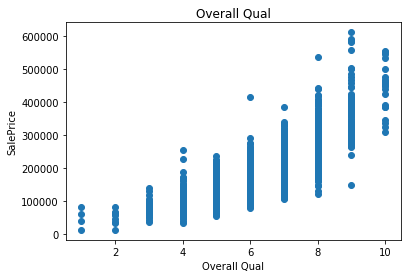

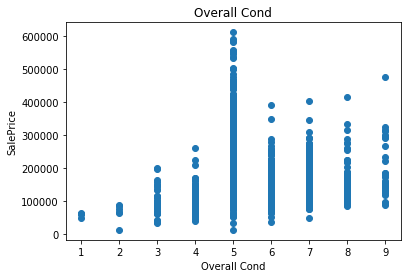

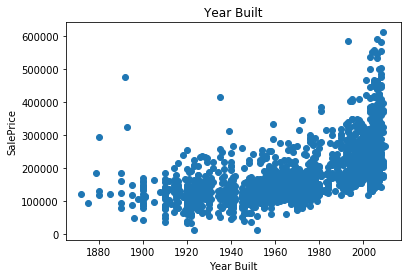

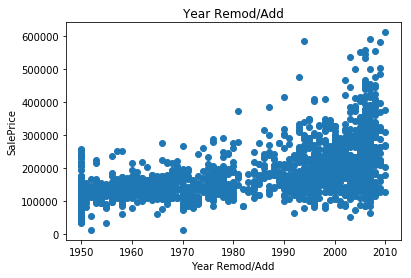

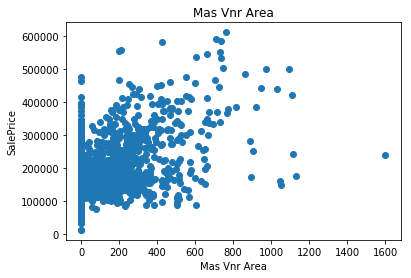

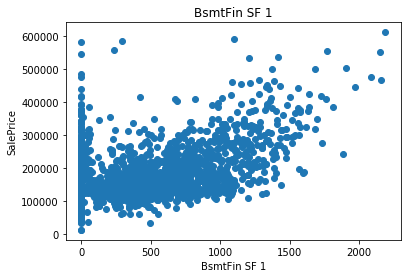

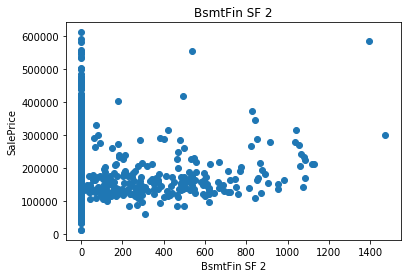

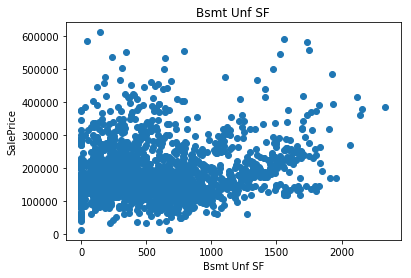

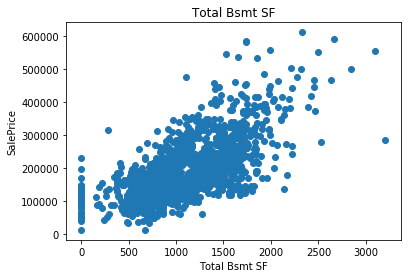

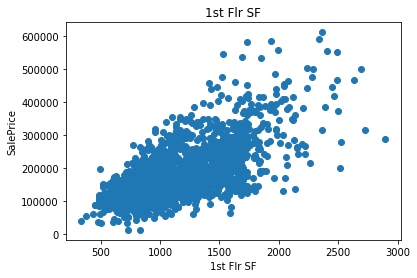

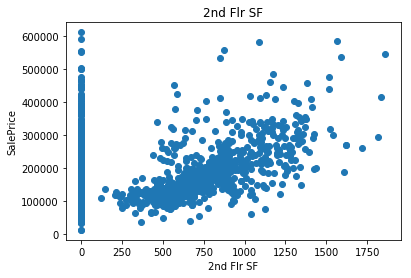

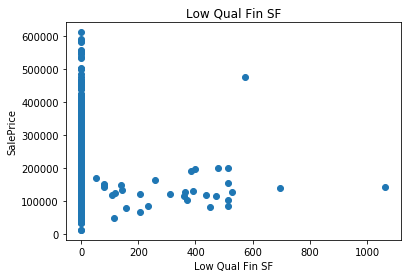

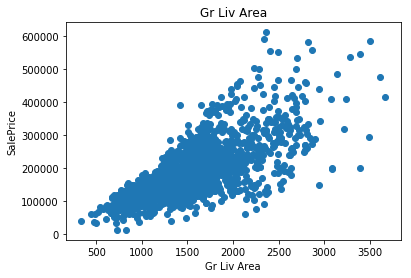

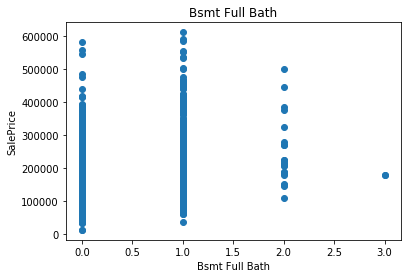

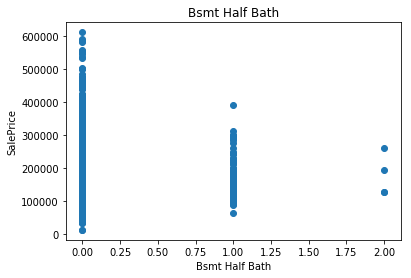

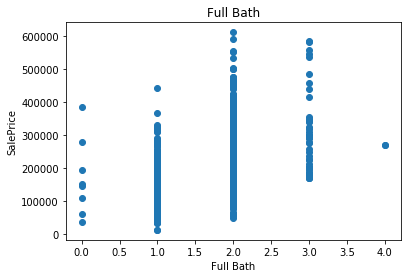

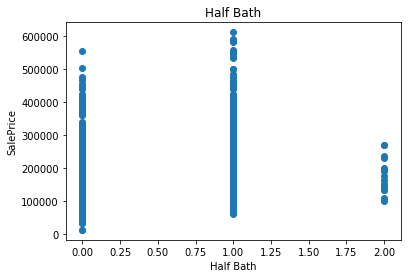

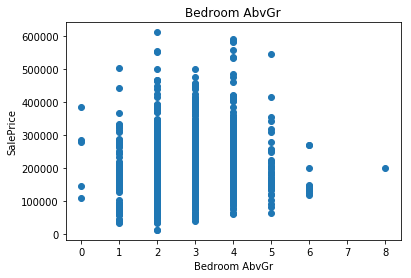

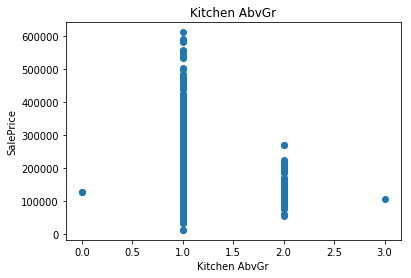

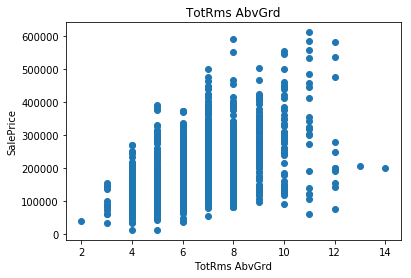

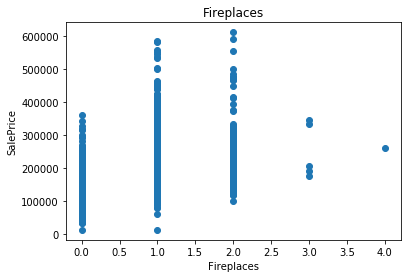

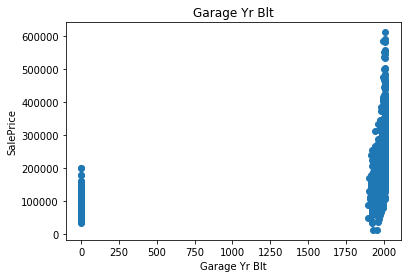

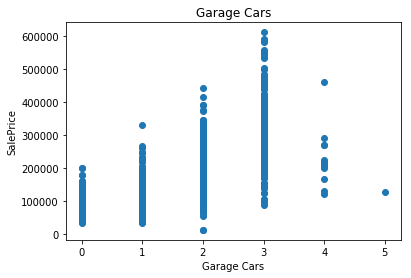

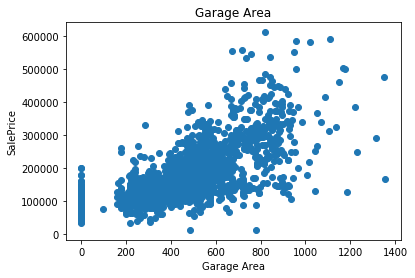

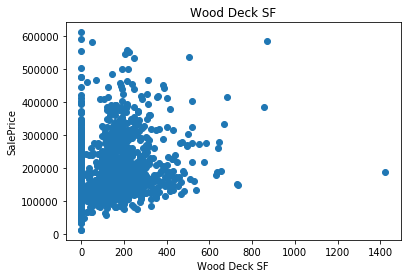

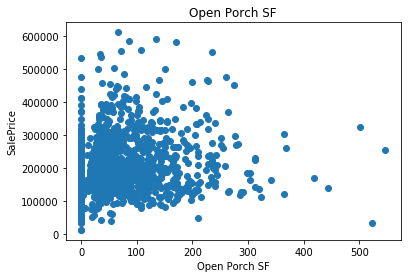

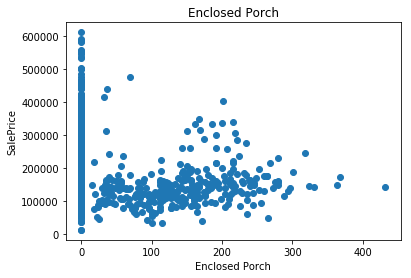

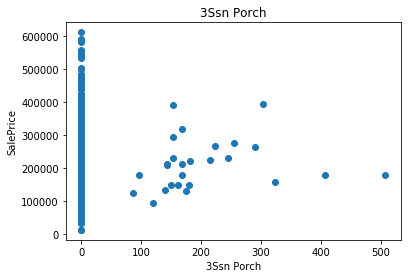

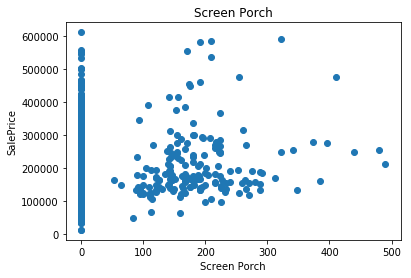

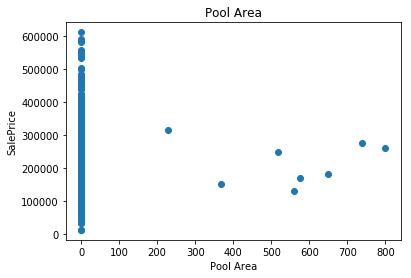

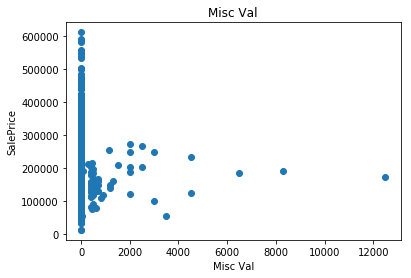

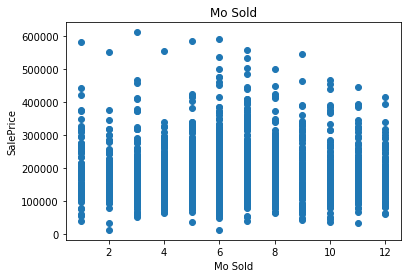

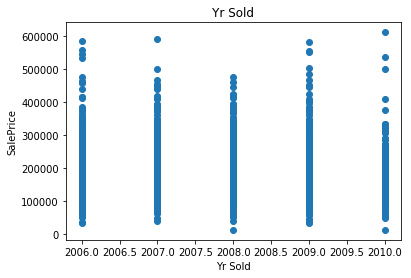

In [12]:
# remove outliers

# lets begin with Lot Frontage, Lot Area, BsmtFin SF1, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Garage Yr Blt
df_train = df_train[(df_train['Lot Frontage']<300) & 
                    (df_train['Lot Area']<60000) &
                    (df_train['BsmtFin SF 1']<3500) & 
                    (df_train['Total Bsmt SF']<4000) &
                    (df_train['1st Flr SF']<3000) &
                    (df_train['Gr Liv Area']<4000) &
                    (df_train['Garage Yr Blt']<2020)]
for i in range(len(numerical_features)):
    plt.scatter(df_train[numerical_features[i]],df_train['SalePrice'])
    plt.title(numerical_features[i])
    plt.xlabel(numerical_features[i])
    plt.ylabel('SalePrice')
    plt.show()
    
# outliers all removed!

## Split into features/target, train/test

In [13]:
# create features dataset, and target ('SalePrice') dataset. also drop ID and PID cols cos useless
features = [k for k in df_train.columns if (k!='SalePrice') & (k!='Id') & (k!='PID')]
X_train = df_train[features]
y_train = df_train['SalePrice']
X_test = df_test[features]

In [14]:
X_train_test = pd.concat([X_train, X_test])
print(X_train.shape)    #to see how many rows there are in X_train/test, for splitting up again later
print(X_test.shape)

(2042, 78)
(879, 78)


In [15]:
X_train_test.info()

# test data (and train data concatenated abv it) has no nulls now!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 878
Data columns (total 78 columns):
MS SubClass        2921 non-null object
MS Zoning          2921 non-null object
Lot Frontage       2921 non-null float64
Lot Area           2921 non-null int64
Street             2921 non-null object
Alley              2921 non-null object
Lot Shape          2921 non-null object
Land Contour       2921 non-null object
Utilities          2921 non-null object
Lot Config         2921 non-null object
Land Slope         2921 non-null object
Neighborhood       2921 non-null object
Condition 1        2921 non-null object
Condition 2        2921 non-null object
Bldg Type          2921 non-null object
House Style        2921 non-null object
Overall Qual       2921 non-null int64
Overall Cond       2921 non-null int64
Year Built         2921 non-null int64
Year Remod/Add     2921 non-null int64
Roof Style         2921 non-null object
Roof Matl          2921 non-null object
Exterior 1st      

In [16]:
# getdummies for cols which have categorical data

# identify categorical features (for get dummies later). For concatenated X_train_test data
categorical_features = []
for i in X_train_test.columns:
        if X_train_test[i].dtype == 'object':
            print(i,X_train_test[i].unique())    #see all the categorical/nominal features, and their types
            categorical_features.append(i)

# create dummy variables
X_train_test = pd.get_dummies(X_train_test, categorical_features)

MS SubClass ['60' '20' '50' '180' '160' '70' '120' '190' '85' '30' '90' '80' '75' '45'
 '40' '150']
MS Zoning ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Street ['Pave' 'Grvl']
Alley [0 'Pave' 'Grvl']
Lot Shape ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities ['AllPub' 'NoSeWa' 'NoSewr']
Lot Config ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
Land Slope ['Gtl' 'Sev' 'Mod']
Neighborhood ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
Condition 1 ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
Condition 2 ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
Bldg Type ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
House Style ['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
Roof Style ['G

In [17]:
# having created identical dummy cols in both train and test data, now we split them back out
# (if we had created dummies first, then scale... we wouldnt have been able to scaler.transform from train to test data,
# cos they'd hv different cols)
X_train = X_train_test.iloc[:2042,:]
X_test = X_train_test.iloc[2042:,:]             ### Good

In [18]:
X_train.columns[:35]

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold'],
      dtype='object')

## Scaling

In [19]:
# scaling
scaler = StandardScaler()                                ### Might want to try different scaling schemes here. RobustScalar?
X_train_s = pd.DataFrame(scaler.fit_transform(X_train))
X_train_s.columns=X_train.columns
X_test_s = pd.DataFrame(scaler.transform(X_test))   #ONLY transform the test set using fit from train set, DONT fit!
X_test_s.columns=X_test.columns

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [20]:
# cross val score the base linear reg model (with ALL features)
lr = LinearRegression()
cross_val_score(lr, X_train_s, y_train, cv=5).mean()

-6.940063822805476e+22

Clearly, without feature selection, the R2 is very poor. so lets try to do better feature selection...

In [21]:
# cross val score the base linear reg model (with just a few sensible business features - highest corr to SalePrice)
lr = LinearRegression()
print(cross_val_score(lr, X_train_s[['Overall Qual','Gr Liv Area','Garage Area']], y_train, cv=5).mean())

lr.fit(X_train_s, y_train)
# for submission
def submission(model, df_test, X_test_s):
    my_submission = pd.DataFrame(df_test.Id, columns = ['Id'])
    my_submission['SalePrice'] = model.predict(X_test_s) 
    return my_submission.to_csv('submission.csv', index=False)

submission(lr, df_test, X_test_s)

0.7794357260394754


Clearly, with sensible business features selection, the R2 improved significantly to a sensible 0.779.

Kaggle score 1067149275989930.00000. Absolutely atrocious

## Feature selection (numerical features)

In [22]:
# or... feature selection (on numerical features) using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=3.5):    #lets be strict and set threshold not at 5 but at 3.5
    cols = X.columns
    variables = np.arange(X.shape[1])
    drop_cols = []
    dropped=True
    while dropped:
        dropped=False                   ### Control flow here is a bit odd and could probably be simplified
        c = X[cols[variables]].values   ### while dropped == True, check max. If max /> thresh, switch dropped to False
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            drop_cols.append(X[cols[variables]].columns[maxloc])
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]], drop_cols

X_train_s_numerical_VIF, drop_cols = calculate_vif_(X_train_s.iloc[:,:35])    #numerical features end at col 35

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'BsmtFin SF 1' at index: 7
dropping '1st Flr SF' at index: 10
dropping 'Gr Liv Area' at index: 12
dropping 'Garage Cars' at index: 21
dropping '2nd Flr SF' at index: 10
dropping 'Year Built' at index: 4
Remaining variables:
Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')


Recall from the earlier heatmap, the feature-pairs with high correlation were:

-1st Flr SF, Total Bsmt SF (0.81)

-Yr built, Garage Yr Built (0.83)

-Gr Liv Area, TotRooms AbvGrd (0.81)

-Garage Area, Garage Cars (0.89).

And indeed after VIF, 1 out of each pair has been removed.

In [23]:
# see which collinear numerical cols have been dropped by VIF 
drop_cols   ### Reminder that you've only looked for linear correlation. Some features might be correlated in a non-linear 
            ### manner. Try feature engineering.

['BsmtFin SF 1',
 '1st Flr SF',
 'Gr Liv Area',
 'Garage Cars',
 '2nd Flr SF',
 'Year Built']

In [24]:
# drop collinear numerical cols in train and test data
X_train_s = X_train_s.drop(drop_cols, axis=1);
X_test_s = X_test_s.drop(drop_cols, axis=1);

In [25]:
# get only numerical cols, store into another dataframe
X_train_s_numerical = X_train_s.iloc[:,:29]    #after dropping cols, numerical cols end at 29
X_test_s_numerical = X_test_s.iloc[:,:29]

##### Score lr, ridge, lasso, and try regularizing too

In [26]:
# check R2 by VIF_lr on only numerical cols
print(cross_val_score(lr, X_train_s_numerical_VIF, y_train, cv=5))
print(cross_val_score(lr, X_train_s_numerical_VIF, y_train, cv=5).mean())

lr.fit(X_train_s_numerical_VIF, y_train)
# for submission
submission(lr, df_test, X_test_s_numerical)

[0.81623387 0.86280639 0.86469783 0.86129838 0.84746727]
0.8505007475711451


R2 of VIF_lr on numerical cols was improved to 0.8505 (relative to simply lr: 0.779).

Kaggle score 35.063k.

##### VIF_ridge

In [27]:
# try VIF_Ridge on only numerical cols
ridge = Ridge()                                                      ### Be careful here. Very close to a naming collision.
print(cross_val_score(ridge, X_train_s_numerical_VIF, y_train, cv=5))
print(cross_val_score(ridge, X_train_s_numerical_VIF, y_train, cv=5).mean())

ridge.fit(X_train_s_numerical_VIF, y_train)
# for submission
submission(ridge, df_test, X_test_s_numerical)

[0.81624607 0.86282821 0.86469016 0.86133359 0.8474563 ]
0.8505108654884136


Pretty good R2 at 0.8505.

Kaggle score 35.066k.

##### VIF_ridge_optimal

In [28]:
# optimise alpha of VIF_Ridge
r_alphas = np.logspace(0,5,200)
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train_s_numerical_VIF, y_train)
ridge_optimal_alpha = ridge_model.alpha_
print(ridge_optimal_alpha)

ridge_model_optimal = Ridge(alpha=ridge_optimal_alpha)
print(cross_val_score(ridge_model_optimal, X_train_s_numerical_VIF, y_train, cv=5))        ### You're calling the cvs function
print(cross_val_score(ridge_model_optimal, X_train_s_numerical_VIF, y_train, cv=5).mean()) ### twice here. This happens to 
                                                                                           ### very fast in this project, 
ridge_model_optimal.fit(X_train_s_numerical_VIF, y_train)                                  ### but in general you shouldn't
# for submission                                                                           ### do this. 
submission(ridge_model_optimal, df_test, X_test_s_numerical)

18.041864093920726
[0.81638766 0.86310818 0.8644978  0.86183413 0.84721842]
0.8506092377037809


Improved R2 at 0.8506.

Kaggle score 35.112k.

##### VIF_lasso

In [29]:
# try VIF_Lasso on only numerical cols
lasso = Lasso()
print(cross_val_score(lasso, X_train_s_numerical_VIF, y_train, cv=5))
print(cross_val_score(lasso, X_train_s_numerical_VIF, y_train, cv=5).mean())

lasso.fit(X_train_s_numerical_VIF, y_train)
# for submission
submission(lasso, df_test, X_test_s_numerical)

[0.81624141 0.86280876 0.86469784 0.86130516 0.84746649]
0.8505039321200585


Similarly good R2 as for Ridge, at 0.8505.

Kaggle score 35.063k.

##### VIF_lasso_optimal

In [30]:
# optimise alpha of VIF_Lasso
l_alphas = np.arange(0,0.001,0.1)                       ### Same isssue with np.arange(0,0.001,0.1) here.
lasso_model = LassoCV(alphas = l_alphas, cv=5)          ### For symmetry, usually use np.logspace / np.linspace
lasso_model = lasso_model.fit(X_train_s_numerical_VIF, y_train)
lasso_optimal_alpha = lasso_model.alpha_
print(lasso_optimal_alpha)

lasso_model_optimal = Lasso(alpha=lasso_optimal_alpha)
print(cross_val_score(lasso_model_optimal, X_train_s_numerical_VIF, y_train, cv=5))
print(cross_val_score(lasso_model_optimal, X_train_s_numerical_VIF, y_train, cv=5).mean())

lasso_model_optimal.fit(X_train_s_numerical_VIF, y_train)
# for submission
submission(lasso_model_optimal, df_test, X_test_s_numerical)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Del

0.0


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Use

[0.81623387 0.86280639 0.86469783 0.86129838 0.84746727]
0.8505007475711451


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Co

No improvement to R2, for optimised VIF_Lasso.

Kaggle score 35.064k.

##### Best model for numerical features?

For numerical features, VIF_ridge or VIF_lasso (optimal or not) all work similar. R2 = 0.8505, kaggle score 35k.

## Feature selection (categorical features)

In [31]:
X_train_categorical = X_train.iloc[:,35:]    #categorical cols begin from col35
X_test_categorical = X_test.iloc[:,35:]

In [32]:
# now we deal with only the categorical features.
# we seek to remove categorical features that contribute least to the target variable

# define function to perform chi2 comparison btw categorical features, and categorical target (converted from continuous).
# keep only k_number of features with highest chi-squared statistics (=contribute most to target)
def chi2_feature_selection(X_train_categorical, y_train, k_number, bin_number):
    # initialise chi2 model     
    skb_chi2 = SelectKBest(chi2, k = k_number) 
    
    # split y_train (SalePrice, a continuous target variable) 
    # into bin_number of bins (hence ordinal now), so that SelectKBest can work  
    y_train_ordinal = pd.cut(y_train, bins=bin_number, labels=np.arange(1,bin_number+1))
    
    # fit transform
    X_train_categorical_chi2 = skb_chi2.fit_transform(X_train_categorical, y_train_ordinal)
    
    # get retained features, get the output dataframe 
    mask = skb_chi2.get_support()
    retained_categorical_features = X_train_categorical.columns[mask]
    X_train_categorical_chi2 = pd.DataFrame(X_train_categorical_chi2, columns = retained_categorical_features)
    
    return X_train_categorical_chi2, skb_chi2, retained_categorical_features

#### Score lr, ridge, lasso, and try regularizing too

In [33]:
# run chi2 function to drop categorical features which aren't strongly related to the target variable

# randomly try k_number = 10, bin_number = 10
X_train_categorical_chi2, skb_chi2, retained_categorical_features = chi2_feature_selection(X_train_categorical, y_train, 10, 10)
X_test_categorical_chi2 = X_test_categorical[retained_categorical_features]

# from amongst lr, ridge, lasso, randomly try lr
lr = LinearRegression()
print(cross_val_score(lr, X_train_categorical_chi2, y_train, cv=5))
print(cross_val_score(lr, X_train_categorical_chi2, y_train, cv=5).mean())

lr.fit(X_train_categorical_chi2, y_train)
# for submission
submission(lr, df_test, X_test_categorical_chi2)

[0.67766173 0.73384851 0.67073791 0.60364507 0.6694699 ]
0.6710726216502128


R2 at 0.671.

Kaggle score 55.2k.

In [34]:
# fix k_number at arbitrary 10. iterate thru number of bins

bin, R2_adj_chi2_lr, R2_adj_chi2_ridge, R2_adj_chi2_lasso =[],[],[],[]    #create empty lists
for bin_number in range(10,100):
    bin.append(bin_number)
    # iterate across multiple k_numbers, and see cross_val_score
    X_train_categorical_chi2, skb_chi2, retained_categorical_features = chi2_feature_selection(X_train_categorical, y_train, 10, bin_number)
    
    # cross val score with lr
    R2_adj_chi2_lr.append(cross_val_score(lr, X_train_categorical_chi2, y_train, cv=5).mean())

    # cross val score with Ridge
    R2_adj_chi2_ridge.append(cross_val_score(ridge, X_train_categorical_chi2, y_train, cv=5).mean())
    
    # cross val score with Lasso
    R2_adj_chi2_lasso.append(cross_val_score(lasso, X_train_categorical_chi2, y_train, cv=5).mean())

In [35]:
# to decide on optimal bin_number...
# see performance of ridge vs lasso 

chi2_df = pd.DataFrame(bin, columns=['bin'])
chi2_df['R2_adj_chi2_lr'] = R2_adj_chi2_lr
chi2_df['R2_adj_chi2_ridge'] = R2_adj_chi2_ridge
chi2_df['R2_adj_chi2_lasso'] = R2_adj_chi2_lasso
chi2_df.sort_values(['R2_adj_chi2_ridge'], ascending=False).head()    #lr is off the charts. sort by ridge's results

,bin,R2_adj_chi2_lr,R2_adj_chi2_ridge,R2_adj_chi2_lasso
3,13,0.674681,0.674723,0.674681
5,15,0.674681,0.674723,0.674681
13,23,0.674681,0.674723,0.674681
8,18,0.674681,0.674723,0.674681
9,19,0.674681,0.674723,0.674681


In [36]:
chi2_df.sort_values(['R2_adj_chi2_lasso'], ascending=False).head()    #sort by lasso's results

,bin,R2_adj_chi2_lr,R2_adj_chi2_ridge,R2_adj_chi2_lasso
8,18,0.674681,0.674723,0.674681
13,23,0.674681,0.674723,0.674681
3,13,0.674681,0.674723,0.674681
11,21,0.674681,0.674723,0.674681
5,15,0.674681,0.674723,0.674681


There isn't really a clear optimal bin_number. Lets just take it as 23.

In [37]:
# now lets fix bin_number at 23, and try iterating thru k_number

k, R2_adj_chi2_lr, R2_adj_chi2_ridge, R2_adj_chi2_lasso =[],[],[],[]    #create empty lists
for k_number in range(10,100):    #max is 292 categorical cols
    k.append(k_number)                                                  ### you could've created this straight away.
    # iterate across multiple k_numbers, and see cross_val_score
    X_train_categorical_chi2, skb_chi2, retained_categorical_features = chi2_feature_selection(X_train_categorical, y_train, k_number, 23)
    
    # cross val score with lr
#     print('CVS (chi2, lr)         =',cross_val_score(lr, X_train_categorical_chi2, y_train, cv=5))
    R2 = cross_val_score(lr, X_train_categorical_chi2, y_train, cv=5).mean()
    R2_adj = 1-((1-R2**2)*(X_train_categorical_chi2.shape[0]-1)/(X_train_categorical_chi2.shape[0]-X_train_categorical_chi2.shape[1]-1))
    R2_adj_chi2_lr.append(R2_adj)

    # cross val score with Ridge
#     print('\nCVS (chi2, ridge)      =',cross_val_score(ridge, X_train_categorical_chi2, y_train, cv=5))
    R2 = cross_val_score(ridge, X_train_categorical_chi2, y_train, cv=5).mean()
    R2_adj = 1-((1-R2**2)*(X_train_categorical_chi2.shape[0]-1)/(X_train_categorical_chi2.shape[0]-X_train_categorical_chi2.shape[1]-1))
    R2_adj_chi2_ridge.append(R2_adj)

    # cross val score with Lasso
#     print('\nCVS (chi2, lasso)      =',cross_val_score(lasso, X_train_categorical_chi2, y_train, cv=5))
    R2 = cross_val_score(lasso, X_train_categorical_chi2, y_train, cv=5).mean()
    R2_adj = 1-((1-R2**2)*(X_train_categorical_chi2.shape[0]-1)/(X_train_categorical_chi2.shape[0]-X_train_categorical_chi2.shape[1]-1))
    R2_adj_chi2_lasso.append(R2_adj)   ### Be careful here since you keep reusing R2_adj
    
# for categorical features, improvements are seen on R2_adj when k_number is changed (use R2_adj cos 
# we're adding features 1 by 1, wanna see the impact of having an additional feature). 

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

In [38]:
# to decide on optimal k_number...
# see performance of ridge & lasso 

chi2_df = pd.DataFrame(k, columns=['k'])             ### a lot of CovergenceWarnings being thrown. Might want to recheck
chi2_df['R2_adj_chi2_lr'] = R2_adj_chi2_lr
chi2_df['R2_adj_chi2_ridge'] = R2_adj_chi2_ridge
chi2_df['R2_adj_chi2_lasso'] = R2_adj_chi2_lasso
chi2_df.sort_values(['R2_adj_chi2_ridge'], ascending=False).head()    #lr is off the charts. sort by ridge's results

,k,R2_adj_chi2_lr,R2_adj_chi2_ridge,R2_adj_chi2_lasso
73,83,6.179945e+41,0.631702,0.627758
86,96,1.069123e+43,0.631444,0.626655
87,97,7.762022e+41,0.631282,0.626505
74,84,8.212804e+40,0.631212,0.627220
88,98,5.463171e+41,0.630970,0.626193


In [39]:
chi2_df.sort_values(['R2_adj_chi2_lasso'], ascending=False).head()    #sort by lasso's results

,k,R2_adj_chi2_lr,R2_adj_chi2_ridge,R2_adj_chi2_lasso
73,83,6.179945e+41,0.631702,0.627758
74,84,8.212804e+40,0.631212,0.627220
86,96,1.069123e+43,0.631444,0.626655
87,97,7.762022e+41,0.631282,0.626505
75,85,9.443064e+39,0.630448,0.626444


We will take the optimal: chi2 ridge AND lasso's k_number = 83 categorical features.

In [40]:
# taking optimal k_number = 83 (out of 292 categorical cols), optimal bin_number = 23
X_train_categorical_chi2, skb_chi2, retained_categorical_features = chi2_feature_selection(X_train_categorical, y_train, 83, 23)
# keep only retained cols, in X_test_categorical 
X_test_categorical_chi2 = X_test_categorical[retained_categorical_features]

##### chi2_ridge

In [41]:
# try chi2_Ridge on only the categorical features
ridge = Ridge()
print(cross_val_score(ridge, X_train_categorical_chi2, y_train, cv=5))
print(cross_val_score(ridge, X_train_categorical_chi2, y_train, cv=5).mean())

ridge.fit(X_train_categorical_chi2, y_train)
# for submission
submission(ridge, df_test, X_test_categorical_chi2)

[0.84730419 0.830533   0.79167546 0.76515079 0.78615576]
0.8041638419254008


Pretty good R2 at 0.80416.

Kaggle score 43.216k.

##### chi2_ridge_optimal

In [42]:
# optimise alpha of chi2_Ridge
r_alphas = np.logspace(0,5,200)
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train_categorical_chi2, y_train)
ridge_optimal_alpha = ridge_model.alpha_
print(ridge_optimal_alpha)

ridge_model_optimal = Ridge(alpha=ridge_optimal_alpha)
print(cross_val_score(ridge_model_optimal, X_train_categorical_chi2, y_train, cv=5))
print(cross_val_score(ridge_model_optimal, X_train_categorical_chi2, y_train, cv=5).mean())

ridge_model_optimal.fit(X_train_categorical_chi2, y_train)
# for submission
submission(ridge_model_optimal, df_test, X_test_categorical_chi2)

1.3354515629298989
[0.84790969 0.83086235 0.79087418 0.76494135 0.78625134]
0.8041677805464384


Similar R2 at 0.80417, marginal improvement.

Kaggle score 43.205k.

##### chi2_lasso

In [43]:
# try chi2_Lasso on only the categorical features
lasso = Lasso()
print(cross_val_score(lasso, X_train_categorical_chi2, y_train, cv=5))
print(cross_val_score(lasso, X_train_categorical_chi2, y_train, cv=5).mean())

lasso.fit(X_train_categorical_chi2, y_train)
# for submission
submission(lasso, df_test, X_test_categorical_chi2)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[0.83998586 0.82372137 0.79502977 0.76496004 0.78534105]


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

0.8018076203776152


Similarly good R2 as for Ridge, at 0.8018.

Kaggle score 43.324k.

##### chi2_lasso_optimal

In [44]:
# optimise alpha of chi2_Lasso
l_alphas = np.arange(0,0.001,0.1)                            ###  np.arange(0,0.001,0.1) -> array([0.]) 
lasso_model = LassoCV(alphas = l_alphas, cv=5)               ###  You probably want np.arange(0,0.01,0.001)
lasso_model = lasso_model.fit(X_train_categorical_chi2, y_train)
lasso_optimal_alpha = lasso_model.alpha_
print(lasso_optimal_alpha)

lasso_model_optimal = Lasso(alpha=lasso_optimal_alpha)
print(cross_val_score(lasso_model_optimal, X_train_categorical_chi2, y_train, cv=5))
print(cross_val_score(lasso_model_optimal, X_train_categorical_chi2, y_train, cv=5).mean())

lasso_model_optimal.fit(X_train_categorical_chi2, y_train)
# for submission
submission(lasso_model_optimal, df_test, X_test_categorical_chi2)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Del

0.0


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Co

[0.83990334 0.82330251 0.79528208 0.76498368 0.78510576]


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Co

0.8017154758599702


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Worsened R2 0.8017, for optimised VIF_Lasso.

Kaggle score 43.329k.

##### Best model for categorical features?

For categorical features, optimised chi2_Ridge works best (R2 = 0.80417, kaggle score 43.205k).

## Recombine numerical AND categorical features. Score with ridge, lasso, regularization

##### VIF_chi2_ridge

In [45]:
# finally, recombine numerical_VIF AND categorical_chi2 feature dataframes tgt, and ridge it
X_train_s_numerical_VIF_categorical_chi2 = X_train_s.iloc[:,:29]    #numerical cols end at col29
X_train_s_numerical_VIF_categorical_chi2[retained_categorical_features] = X_train_categorical_chi2
X_test_s_numerical_VIF_categorical_chi2 = X_test_s.iloc[:,:29]
X_test_s_numerical_VIF_categorical_chi2[retained_categorical_features] = X_test_categorical_chi2

# try VIF_chi2_Ridge on combined numerical & categorical features
ridge = Ridge()
print(cross_val_score(ridge, X_train_s_numerical_VIF_categorical_chi2, y_train, cv=5))
print(cross_val_score(ridge, X_train_s_numerical_VIF_categorical_chi2, y_train, cv=5).mean())

ridge.fit(X_train_s_numerical_VIF_categorical_chi2, y_train)
# for submission
submission(ridge, df_test, X_test_s_numerical_VIF_categorical_chi2)

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


[0.89708899 0.90900347 0.90997749 0.90341625 0.90012456]
0.9039221512928612


Too good R2 at 0.9039, maybe overfit.

Kaggle score 30.251k.

##### VIF_chi2_ridge_optimal

In [46]:
# optimise alpha of VIF_chi2_Ridge
r_alphas = np.logspace(0,5,200)
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train_s_numerical_VIF_categorical_chi2, y_train)
ridge_optimal_alpha = ridge_model.alpha_
print(ridge_optimal_alpha)

ridge_model_optimal = Ridge(alpha=ridge_optimal_alpha)
print(cross_val_score(ridge_model_optimal, X_train_s_numerical_VIF_categorical_chi2, y_train, cv=5))
print(cross_val_score(ridge_model_optimal, X_train_s_numerical_VIF_categorical_chi2, y_train, cv=5).mean())

ridge_model_optimal.fit(X_train_s_numerical_VIF_categorical_chi2, y_train)
# for submission
submission(ridge_model_optimal, df_test, X_test_s_numerical_VIF_categorical_chi2)

3.0018358135755894
[0.89660379 0.90936786 0.90936667 0.90370506 0.90027994]
0.9038646626492911


Improved R2 at 0.9039.

Kaggle score 30.227k.

##### VIF_chi2_lasso

In [47]:
# try VIF_chi2_lasso on combined numerical & categorical features
lasso = Lasso()
print(cross_val_score(lasso, X_train_s_numerical_VIF_categorical_chi2, y_train, cv=5))
print(cross_val_score(lasso, X_train_s_numerical_VIF_categorical_chi2, y_train, cv=5).mean())

lasso.fit(X_train_s_numerical_VIF_categorical_chi2, y_train)
# for submission
submission(lasso, df_test, X_test_s_numerical_VIF_categorical_chi2)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

[0.89600654 0.9082648  0.91047817 0.90283721 0.89868562]


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

0.9032544676832748


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Too good R2 at 0.9032, maybe overfit.

Kaggle score 30.309k.

##### VIF_chi2_lasso_optimal

In [48]:
# optimise alpha of VIF_chi2_Lasso
l_alphas = np.arange(0,0.001,0.1)
lasso_model = LassoCV(alphas = l_alphas, cv=5)
lasso_model = lasso_model.fit(X_train_s_numerical_VIF_categorical_chi2, y_train)
lasso_optimal_alpha = lasso_model.alpha_
print(lasso_optimal_alpha)

lasso_model_optimal = Lasso(alpha=lasso_optimal_alpha)
print(cross_val_score(lasso_model_optimal, X_train_s_numerical_VIF_categorical_chi2, y_train, cv=5))
print(cross_val_score(lasso_model_optimal, X_train_s_numerical_VIF_categorical_chi2, y_train, cv=5).mean())

lasso_model_optimal.fit(X_train_s_numerical_VIF_categorical_chi2, y_train)
# for submission
submission(lasso_model_optimal, df_test, X_test_s_numerical_VIF_categorical_chi2)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Del

0.0


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Use

[0.89596694 0.90804509 0.91045913 0.90259358 0.89795197]


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Use

0.9030033402793928


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Similar R2 0.903, for optimised VIF_chi2_lasso.

Kaggle score 30.338k.

## Overall view of R2, kaggle scores of all models

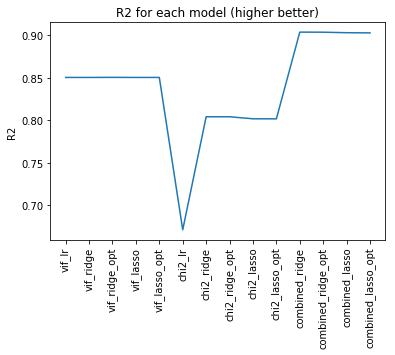

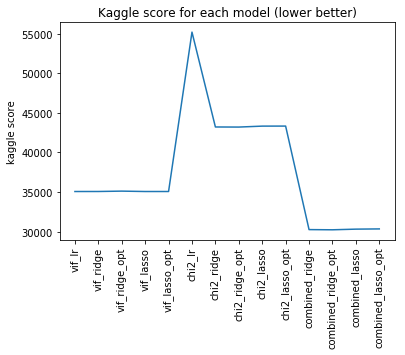

In [49]:
labels = ['vif_lr',
            'vif_ridge',
            'vif_ridge_opt',
            'vif_lasso',
            'vif_lasso_opt',
            'chi2_lr',
            'chi2_ridge',
            'chi2_ridge_opt',
            'chi2_lasso',
            'chi2_lasso_opt',
            'combined_ridge',
            'combined_ridge_opt',
            'combined_lasso',
            'combined_lasso_opt']
r2 = [      0.8505,
            0.8505,
            0.8506,
            0.8505,
            0.8505,
            0.671,
            0.80416,
            0.80417,
            0.8018,
            0.8017,
            0.9039,
            0.9038,
            0.9032,
            0.903]
kaggle = [  35063,
            35066,
            35112,
            35063,
            35064,
            55200,
            43216,
            43205,
            43324,
            43329,
            30251,
            30227,
            30309,
            30338]
plt.plot(r2)
plt.xticks(np.arange(len(labels)),labels, rotation=90);
plt.ylabel('R2');
plt.title('R2 for each model (higher better)');
plt.show()
plt.plot(kaggle)
plt.xticks(np.arange(len(labels)),labels, rotation=90);
plt.ylabel('kaggle score');
plt.title('Kaggle score for each model (lower better)');

For numerical AND categorical features combined, VIF_chi2_ridge_optimal works best (R2 = 0.9039, kaggle score 30.227k).

Its kaggle score is lower/better than VIF on numerical features alone (kaggle 35k), or chi2 on categorical features alone (kaggle 43.205k).

In [ ]:
### Bar chart would be better here. Line would suggests some sort of relationship between increasing x values.

## Which features affect SalePrice the most (best, worst)?

##### Best 10

In [50]:
# print these positive features from best to least best
best_10 = pd.DataFrame(ridge_model_optimal.coef_, columns=['coef']).sort_values('coef',ascending=False).head(10)
col_number = pd.DataFrame(ridge_model_optimal.coef_, columns=['coef']).sort_values('coef',ascending=False).head(10).index
best_10['feature'] = X_train_s_numerical_VIF_categorical_chi2.columns[col_number]
best_10

,coef,feature
42,33821.965100,Neighborhood_NoRidge
52,31521.589769,Roof Matl_WdShngl
46,29624.734471,Neighborhood_StoneBr
107,23916.540938,Garage Qual_Gd
8,22269.323715,Total Bsmt SF
88,19251.150087,Kitchen Qual_Ex
61,17242.861241,Exter Qual_Ex
99,16726.193958,Garage Type_BuiltIn
43,16588.552042,Neighborhood_NridgHt
77,15368.512483,Bsmt Exposure_Gd


In [51]:
# look at the mean saleprice, for houses which have/excel in these features
print('Mean SalePrice (Neighborhood_NoRidge) =',df_train[df_train['Neighborhood']=='NoRidge'].SalePrice.mean())
print('Mean SalePrice (Roof Matl_WdShngl)    =',df_train[df_train['Roof Matl']=='WdShngl'].SalePrice.mean())
print('Mean SalePrice (Neighborhood_StoneBr) =',df_train[df_train['Neighborhood']=='StoneBr'].SalePrice.mean())
print('Mean SalePrice (Garage Qual_Gd)       =',df_train[df_train['Garage Qual']=='Gd'].SalePrice.mean())
print('Mean SalePrice (Total Bsmt SF)        =',df_train.sort_values('Total Bsmt SF', ascending=False).head(100).SalePrice.mean())
print('Mean SalePrice (Kitchen Qual_Ex)      =',df_train[df_train['Kitchen Qual']=='Ex'].SalePrice.mean())
print('Mean SalePrice (Exter Qual_Ex)        =',df_train[df_train['Exter Qual']=='Ex'].SalePrice.mean())
print('Mean SalePrice (Garage Type_BuiltIn)  =',df_train[df_train['Garage Type']=='BuiltIn'].SalePrice.mean())
print('Mean SalePrice (Neighborhood_NridgHt) =',df_train[df_train['Neighborhood']=='NridgHt'].SalePrice.mean())
print('Mean SalePrice (Bsmt Exposure_Gd)     =',df_train[df_train['Bsmt Exposure']=='Gd'].SalePrice.mean())

Mean SalePrice (Neighborhood_NoRidge) = 313874.8510638298
Mean SalePrice (Roof Matl_WdShngl)    = 354250.0
Mean SalePrice (Neighborhood_StoneBr) = 329675.7368421053
Mean SalePrice (Garage Qual_Gd)       = 262989.27777777775
Mean SalePrice (Total Bsmt SF)        = 335801.5
Mean SalePrice (Kitchen Qual_Ex)      = 339484.6530612245
Mean SalePrice (Exter Qual_Ex)        = 379587.7848101266
Mean SalePrice (Garage Type_BuiltIn)  = 247883.52272727274
Mean SalePrice (Neighborhood_NridgHt) = 322831.3524590164
Mean SalePrice (Bsmt Exposure_Gd)     = 272548.7055837563


These best 10 features truly are representative of houses with high saleprices. 

##### Worst 10

In [52]:
# print these negative features from worst to least worst
worst_10 = pd.DataFrame(ridge_model_optimal.coef_, columns=['coef']).sort_values('coef',ascending=True).head(10)
col_number = pd.DataFrame(ridge_model_optimal.coef_, columns=['coef']).sort_values('coef',ascending=True).head(10).index
worst_10['feature'] = X_train_s_numerical_VIF_categorical_chi2.columns[col_number]
worst_10

,coef,feature
92,-14793.814734,Functional_Sal
84,-11655.560855,Heating QC_Po
31,-10951.824264,MS Zoning_A (agr)
64,-9196.783825,Exter Qual_TA
81,-8928.719741,Heating_Grav
7,-7958.539757,Bsmt Unf SF
73,-7812.518201,Bsmt Qual_Gd
91,-7775.999311,Kitchen Qual_TA
38,-7549.908939,Neighborhood_Gilbert
44,-7276.026174,Neighborhood_OldTown


In [53]:
# look at the mean saleprice, for houses which have/flounder in these features
print('Mean SalePrice (Functional_Sal)       =',df_train[df_train['Functional']=='Sal'].SalePrice.mean())
print('Mean SalePrice (Heating QC_Po)        =',df_train[df_train['Heating QC']=='Po'].SalePrice.mean())
print('Mean SalePrice (MS Zoning_A (agr))    =',df_train[df_train['MS Zoning']=='A (agr)'].SalePrice.mean())
print('Mean SalePrice (Exter Qual_TA)        =',df_train[df_train['Exter Qual']=='TA'].SalePrice.mean())
print('Mean SalePrice (Heating_Grav)         =',df_train[df_train['Heating']=='Grav'].SalePrice.mean())
print('Mean SalePrice (Bsmt Unf SF)          =',df_train.sort_values('Bsmt Unf SF', ascending=True).head(100).SalePrice.mean())
print('Mean SalePrice (Bsmt Qual_Gd)         =',df_train[df_train['Bsmt Qual']=='Gd'].SalePrice.mean())
print('Mean SalePrice (Kitchen Qual_TA)      =',df_train[df_train['Kitchen Qual']=='TA'].SalePrice.mean())
print('Mean SalePrice (Neighborhood_Gilbert) =',df_train[df_train['Neighborhood']=='Gilbert'].SalePrice.mean())
print('Mean SalePrice (Neighborhood_OldTown) =',df_train[df_train['Neighborhood']=='OldTown'].SalePrice.mean())

Mean SalePrice (Functional_Sal)       = 31550.0
Mean SalePrice (Heating QC_Po)        = 69033.33333333333
Mean SalePrice (MS Zoning_A (agr))    = 47300.0
Mean SalePrice (Exter Qual_TA)        = 142840.07240547062
Mean SalePrice (Heating_Grav)         = 65180.0
Mean SalePrice (Bsmt Unf SF)          = 142152.89
Mean SalePrice (Bsmt Qual_Gd)         = 201858.00815850816
Mean SalePrice (Kitchen Qual_TA)      = 139501.60744985673
Mean SalePrice (Neighborhood_Gilbert) = 189228.3879310345
Mean SalePrice (Neighborhood_OldTown) = 125276.30061349693


These worst 10 features truly are representative of houses with low saleprices. 

##### Any features that were surprisingly not in either lists? Let's explore their mean saleprice

In [54]:
# see all columns again
df_train.columns[:]

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Earlier from the heatmap we said: 

"We also see that some features are highly correlated to the target SalePrice:

-Overall Qual (0.8)

-Gr Liv Area (0.7)

-Garage Cars (0.65), Garage Area (0.65)..."

So lets take a look at these positive contributors to saleprice (from heatmap none were significant negative contributors)...

In [55]:
print('Mean SalePrice (Overall Qual) =',df_train.sort_values('Garage Area', ascending=False).head(3).SalePrice.mean())
print('Mean SalePrice (Gr Liv Area)  =',df_train.sort_values('Gr Liv Area', ascending=False).head(100).SalePrice.mean())
print('Mean SalePrice (Garage Area)  =',df_train.sort_values('Garage Area', ascending=False).head(100).SalePrice.mean())
print('Mean SalePrice (Garage Cars)  =',df_train.sort_values('Garage Cars', ascending=False).head(3).SalePrice.mean())

Mean SalePrice (Overall Qual) = 311833.3333333333
Mean SalePrice (Gr Liv Area)  = 326049.21
Mean SalePrice (Garage Area)  = 302487.9
Mean SalePrice (Garage Cars)  = 173000.0


Houses with all these initially suspected (numerical) positive features all do have somewhat high saleprices, but not as high as most features in the "Best 10" list, which were mostly >320k. The first 3 features here, however, should probably rank within the "Best 10" given that there are some features in the 10 which have average house saleprices of only 200+k. 

Hence this VIF_chi2_ridge_optimal model can be further explored to understand why the first 3 features here, weren't included. As can be seen below, only 'Overall Qual' was found in the "Best 50" list, ranked as a close 13th.

In [56]:
# print these positive features from best to least best
best_50 = pd.DataFrame(ridge_model_optimal.coef_, columns=['coef']).sort_values('coef',ascending=False).head(50)
col_number = pd.DataFrame(ridge_model_optimal.coef_, columns=['coef']).sort_values('coef',ascending=False).head(50).index
best_50['feature'] = X_train_s_numerical_VIF_categorical_chi2.columns[col_number]
best_50.reset_index()

,index,coef,feature
0,42,33821.965100,Neighborhood_NoRidge
1,52,31521.589769,Roof Matl_WdShngl
2,46,29624.734471,Neighborhood_StoneBr
3,107,23916.540938,Garage Qual_Gd
4,8,22269.323715,Total Bsmt SF
5,88,19251.150087,Kitchen Qual_Ex
6,61,17242.861241,Exter Qual_Ex
7,99,16726.193958,Garage Type_BuiltIn
8,43,16588.552042,Neighborhood_NridgHt
9,77,15368.512483,Bsmt Exposure_Gd


## Conclusion

I. VIF_chi2_ridge_optimal model works best (R2 = 0.9039, kaggle score 30227), significantly better than the linreg baseline score (R2 = 0.779, kaggle score = 1067149275989930). 

II. Best 10 features affecting saleprices (best to least best), hence focus our efforts on selling houses which have these features:

    1. 'Neighborhood   = NoRidge'
    2. 'Roof Matl      = WdShngl'
    3. 'Neighborhood   = StoneBr'
    4. 'Garage Qual    = Gd'
    5. Large 'Total Bsmt SF' 
    6. 'Kitchen Qual   = Ex'
    7. 'Exter Qual     = Ex'
    8. 'Garage Type    = BuiltIn'
    9. 'Neighborhood   = NridgHt'
    10. 'Bsmt Exposure = Gd'
       
III. Worst 10 features affecting saleprices (worst to least worst), hence avoid selling houses which have these features:

    1. 'Functional    = Sal'
    2. 'Heating QC    = Po'
    3. 'MS Zoning     = A (agr)'
    4. 'Exter Qual    = TA'
    5  'Heating       = Grav' 
    6. Small 'Bsmt Unf SF'
    7. 'Bsmt Qual     = Gd'
    8. 'Kitchen Qual  = TA'
    9. 'Neighborhood  = Gilbert'
    10. 'Neighborhood = OldTown'

In [ ]:
### I'd like to see a y_pred vs y_test of your chosen model. 